In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import torch
from torch.utils import tensorboard
import pickle

In [2]:
titanic = pd.read_csv('train.csv')

# Display the first few rows of the dataset to understand its structure
titanic.head()
#SibSp and Parch is family members on board with the person
# Fare is Important to know if the more the person has paid the more chances he has of surviving
# Cabin is useless, name is useless, ticket

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
titanic=titanic.drop(["Name", "Ticket", "Cabin","Embarked","PassengerId"], axis=1)

In [4]:
titanic['Sex']=titanic["Sex"].map({'female':0,'male':1})

In [5]:
titanic.columns#see the columns names

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [6]:
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500

In [7]:
titanic.dropna(inplace=True)# delete non atribuated values

In [8]:
titanic.shape

(714, 7)

In [9]:
titanic.describe()

Survived      Pclass         Sex         Age       SibSp       Parch  \
count  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000   
mean     0.406162    2.236695    0.634454   29.699118    0.512605    0.431373   
std      0.491460    0.838250    0.481921   14.526497    0.929783    0.853289   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000   20.125000    0.000000    0.000000   
50%      0.000000    2.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   38.000000    1.000000    1.000000   
max      1.000000    3.000000    1.000000   80.000000    5.000000    6.000000   

             Fare  
count  714.000000  
mean    34.694514  
std     52.918930  
min      0.000000  
25%      8.050000  
50%     15.741700  
75%     33.375000  
max    512.329200

In [10]:
data=titanic.values
X=data[:,1:]#Xtrain
Y=data[:,0]# Ytest

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model=LogisticRegression()

In [12]:

# creating a dictionnary grid with a few different hyper-parameters
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'liblinear', 'saga']
}
# GridSearch Allows us to have the best hyper-parameters
grid = GridSearchCV(LogisticRegression(), param_grid)
logi = LogisticRegression()
# fit the two logistic regression models according to the given training data
grid.fit(X_train, y_train)
logi.fit(X_train, y_train)


C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarni

C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeanb\OneDrive - De Vinci\Bureau\ESILV\Irlande\karibou\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jean

LogisticRegression()

In [13]:
y_pred=logi.predict(X_test)
y_pred_modif=grid.predict(X_test)
accuracy_pred=accuracy_score(y_test,y_pred)
accuracy_pred_modif=accuracy_score(y_test,y_pred_modif)
print(accuracy_pred)
print(accuracy_pred_modif)

0.7832167832167832
0.8041958041958042


In [14]:
accuracy=accuracy_score(y_test,y_pred_modif)
writer=tensorboard.SummaryWriter('models')

In [15]:
with open('models/TitanicLogisticRegression.pkl','wb')as f:
    pickle.dump(grid,f)
print(grid)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']})


In [16]:
print(accuracy)

0.8041958041958042


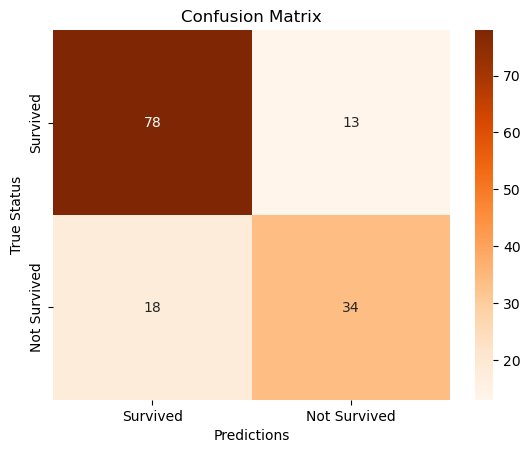

In [17]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",xticklabels=['Survived', 'Not Survived'],
            yticklabels=['Survived', 'Not Survived'])

plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Status')
plt.show()

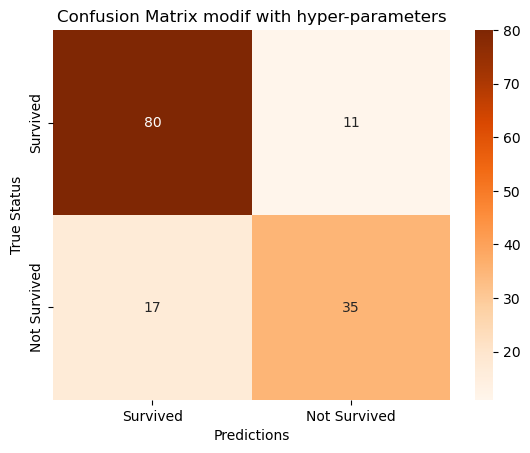

In [19]:
cm2 = confusion_matrix(y_test, y_pred_modif)

sns.heatmap(cm2, annot=True, fmt="d", cmap="Oranges",xticklabels=['Survived', 'Not Survived'],
            yticklabels=['Survived', 'Not Survived'])

plt.title('Confusion Matrix modif with hyper-parameters')
plt.xlabel('Predictions')
plt.ylabel('True Status')
plt.show()